### 1. Import Library-libray yang digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


### 2. Load dataset image fashion yang sudah disediakan Keras


In [ ]:
# loading data
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### 3. Melihat bentuk dan ukuran dataset

In [ ]:
# shape of data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
# data type of dataset
X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

### 4. Meng-create data dan melakukan pen-skalaan dat

In [ ]:
# creating validation data snd scaling data to range (0-1)
X_valid, X_train = X_train[:4000], X_train[4000:] / 255
y_valid, y_train = y_train[:4000], y_train[4000:]
X_test = X_test / 255

### 5. Menampilkan contoh 2 image pertama


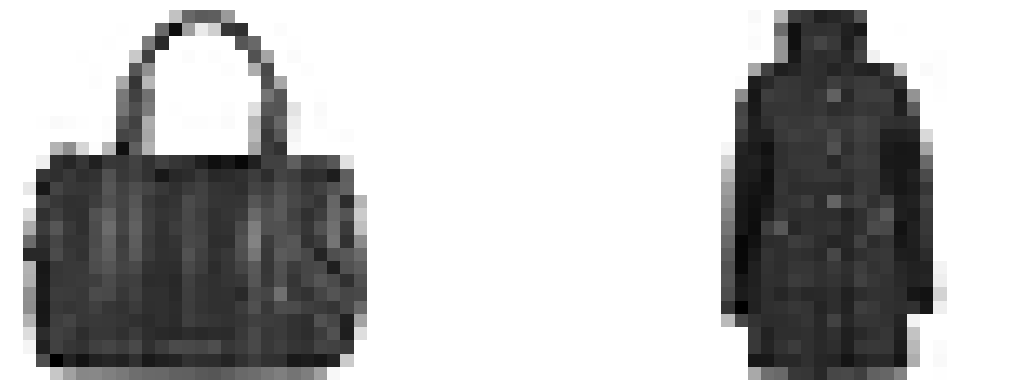

In [ ]:
# looking at first two images
plt.figure(figsize = (15, 4))
plotnumber = 1

for i in range(2):
  if plotnumber <= 2:
    ax = plt.subplot(1, 2, plotnumber)
    plt.imshow(X_train[i], cmap = 'binary')
    plt.axis('off')

  plotnumber += 1
plt.tight_layout()
plt.show()


### 6. 6. Menampilkan hasil label dari training (dalam bentuk array)


In [ ]:
y_train



array([8, 4, 3, ..., 3, 0, 5], dtype=uint8)

## 7. Memberikan nama 10 kelas fashion

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress",
"Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


### 8. Menetapkan kelas dari 2 image pertama


In [ ]:
class_names[y_train[0]], class_names[y_train[1]]


('Bag', 'Coat')

### 9. dari dataset telah diatur, dimana 4000 data digunakan untuk validasi dan 10000 digunakan untuk data test

In [ ]:
X_valid.shape

(4000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

### 10. Tampilkan 10 sampel data pertama

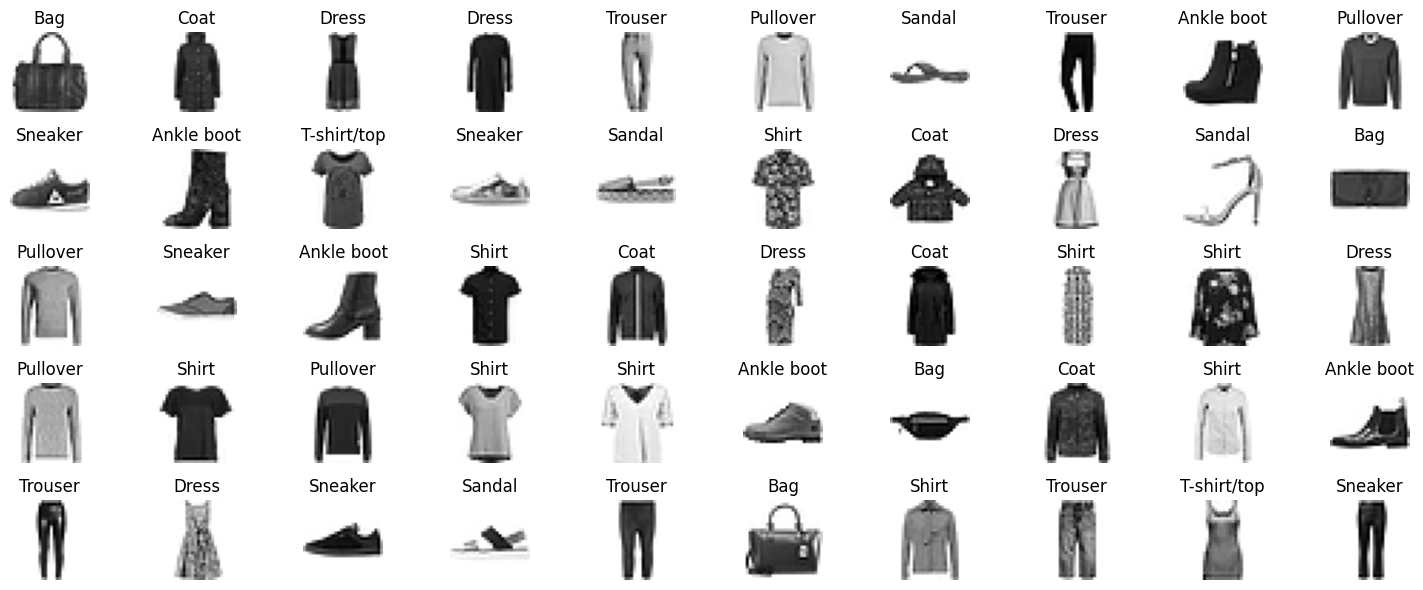

In [ ]:
plt.figure(figsize = (15, 6))
plotnumber = 1
for i in range(51):
  if plotnumber <= 50:
      ax = plt.subplot(5, 10, plotnumber)
      plt.imshow(X_train[i], cmap = 'binary')
      plt.axis('off')
  plt.title(class_names[y_train[i]], fontdict =
{'fontsize' : 12, 'color' : 'black'})

  plotnumber += 1
plt.tight_layout()
plt.show()


### 11. Membangun model Sequential

In [ ]:
# building sequential model
model = keras.models.Sequential([
keras.layers.Flatten(input_shape = [28, 28]),
keras.layers.Dense(100, activation = 'relu'),
keras.layers.Dense(70, activation = 'relu'),
keras.layers.Dense(50, activation = 'relu'),
keras.layers.Dense(20, activation = 'relu'),
keras.layers.Dense(10, activation = 'softmax')
])

### 12. Tampilkan hasil Summary model yang dibangun


In [ ]:
# summary of model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 70)             │         7,070 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         3,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,350 (352.93 KB)

 Trainable params: 90,350 (352.93 KB)

 Non-trainable params: 0 (0.00 B)

### 13. Mengkompilasi model


In [ ]:
# compiling model
model.compile(loss =
tf.keras.losses.SparseCategoricalCrossentropy(),
optimizer = tf.keras.optimizers.Adam(), metrics =
['accuracy'])

### 14. Men-training model dengan jumlah epoch yang telah ditentukan


In [ ]:
# fitting model
model_history = model.fit(X_train, y_train, validation_data =
(X_valid, y_valid), epochs = 4)

Epoch 1/4
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7265 - loss: 0.7877 - val_accuracy: 0.8400 - val_loss: 54.5855
Epoch 2/4
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8538 - loss: 0.4035 - val_accuracy: 0.8413 - val_loss: 59.3242
Epoch 3/4
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8721 - loss: 0.3469 - val_accuracy: 0.8438 - val_loss: 60.7366
Epoch 4/4
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8800 - loss: 0.3235 - val_accuracy: 0.8700 - val_loss: 47.2150


### 15. Melakukan evaluasi model, mendapatkan nilai akurasi dan loss


In [ ]:
# evaluating model
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8649 - loss: 0.3832


[0.3830268681049347, 0.8665000200271606]

### 16. Mem-visualisasikan model yang telah dibuat

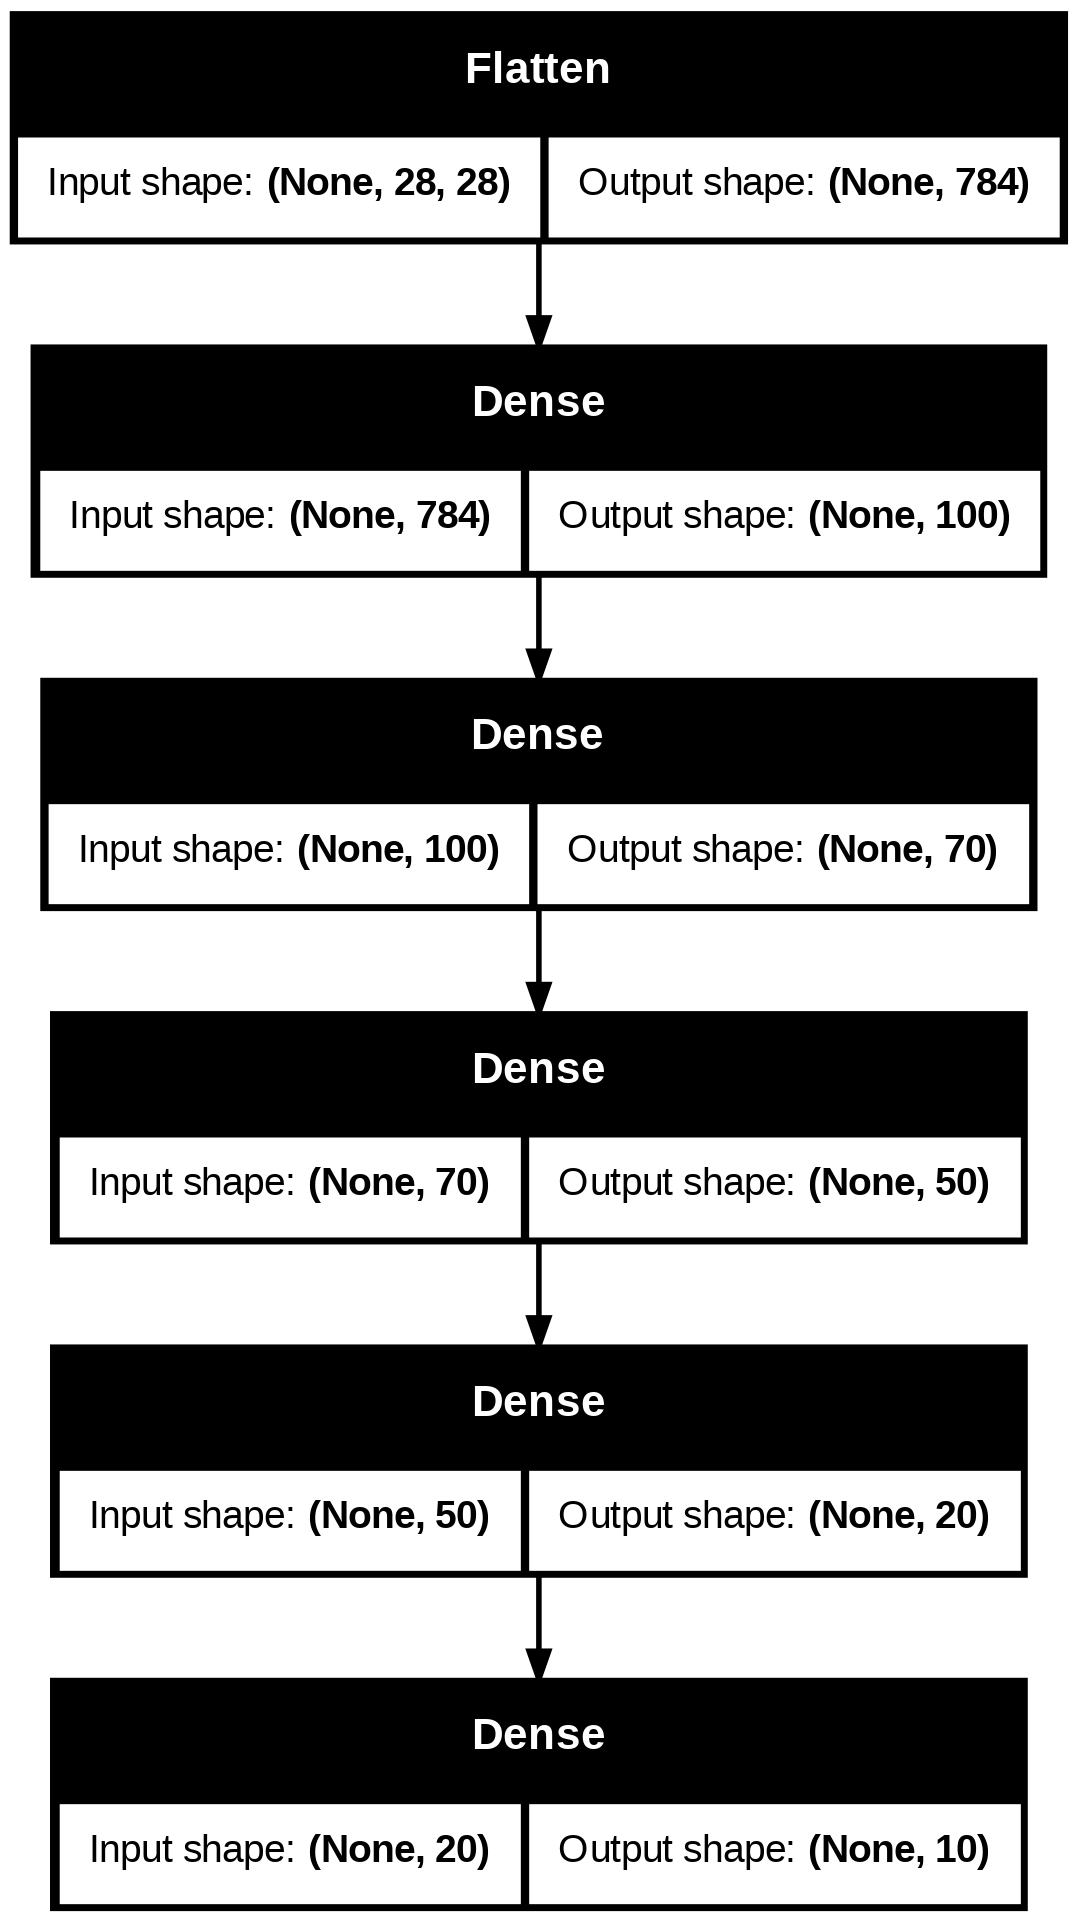

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

### 17. Membuat grafik hasil visualisasi nilai loss training dan validasi untuk setiap epoch

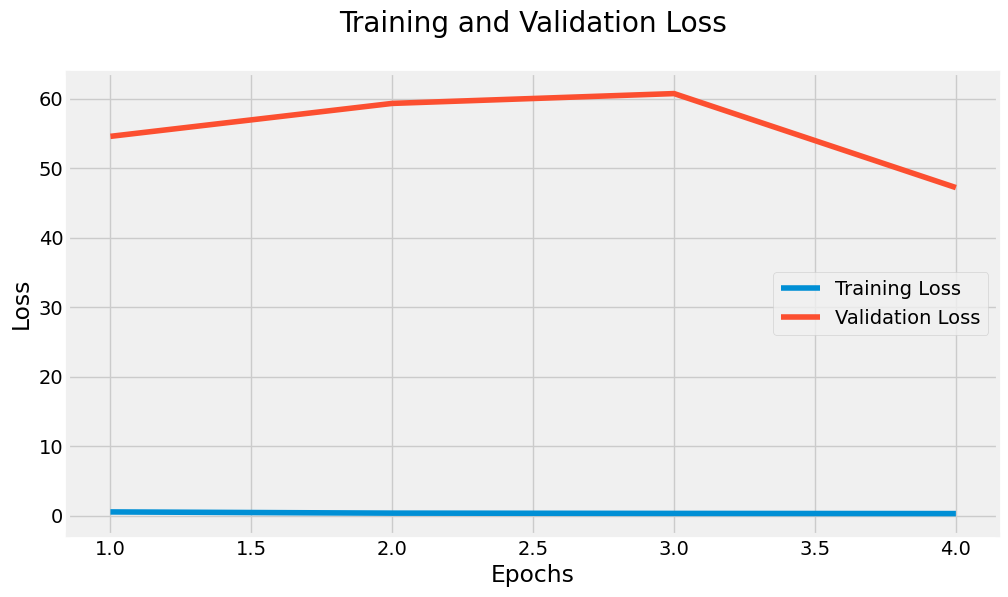

In [ ]:
plt.figure(figsize = (12, 6))
plt.style.use('fivethirtyeight')
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epoch = range(1, 5)
sns.lineplot(x=epoch, y=train_loss, label = 'Training Loss')
sns.lineplot(x=epoch, y=val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()

### 18. Membuat grafik hasil visualisasi nilai akurasi training dan validasi untuk setiap epoch

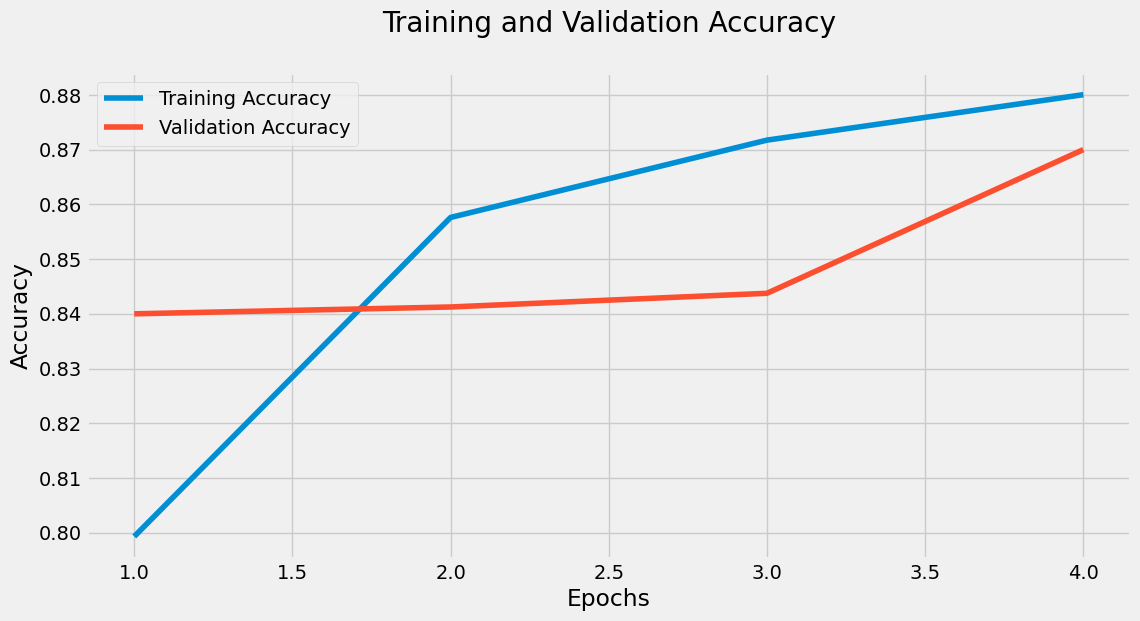

In [ ]:
plt.figure(figsize = (12, 6))
train_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy']
epoch = range(1, 5)
sns.lineplot(x=epoch, y=train_loss, label = 'Training Accuracy')
sns.lineplot(x=epoch, y=val_loss, label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()


### 19. Membuat model Prediksi kelas fashion untuk 100 sampel data pertama

In [ ]:
# making predictions
y_probs = model.predict(X_test)
y_preds = y_probs.argmax(axis = 1)
y_preds[:100]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0, 2, 5,
       7, 5, 1, 2, 6, 0, 9, 4, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 7,
       6, 7, 2, 1, 2, 6, 4, 2, 5, 8, 2, 2, 8, 6, 8, 0, 7, 7, 8, 5, 1, 1,
       6, 4, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
       0, 2, 5, 3, 6, 7, 1, 8, 0, 1, 6, 2])

### 20. Membuat fungsi Confussion Matrix


In [ ]:
# Function for confusion matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    """
    Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values will be used.

    Args:
        y_true: Array of truth labels (must be same shape as y_pred).
        y_pred: Array of predicted labels (must be same shape as y_true).
        classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
        figsize: Size of output figure (default=(10, 10)).
        text_size: Size of output figure text (default=15).

    Returns:
        A labelled confusion matrix plot comparing y_true and y_pred.

    Example usage:
        make_confusion_matrix(
            y_true=test_labels,         # ground truth test labels
            y_pred=y_preds,             # predicted labels
            classes=class_names,        # array of class label names
            figsize=(15, 15),
            text_size=10
        )
    """
    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize it
    n_classes = cm.shape[0]  # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)  # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(
        title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),  # create enough axis slots for each class
        yticks=np.arange(n_classes),
        xticklabels=labels,           # axes will be labeled with class names (if they exist) or ints
        yticklabels=labels
    )

    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j, i,
            f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size
        )


### 21. Memplot grafik Confusion Matrix

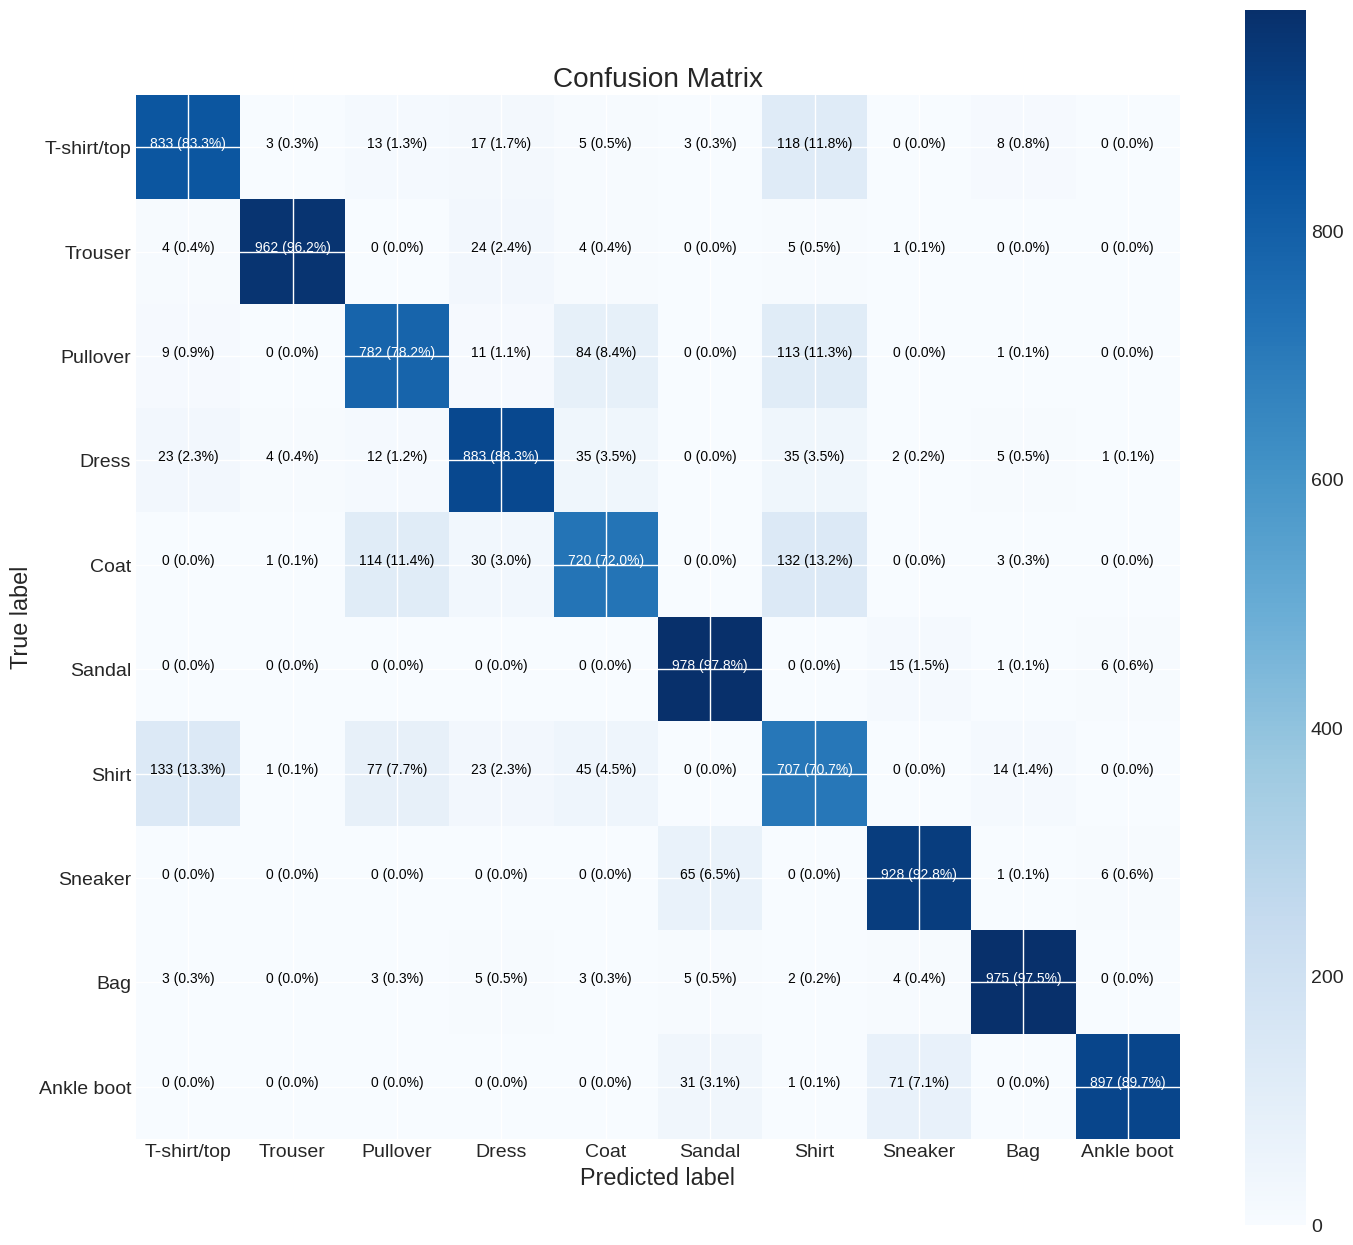

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
make_confusion_matrix(y_true=y_test,
y_pred=y_preds,
classes=class_names,
figsize=(15, 15),
text_size=10)


### 22. Memberikan label hasil prediksi ke 15 image yang random (untuk mengetes apakah hasil prediksi sudah sesuai dengan kondisi nyata atau tidak)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


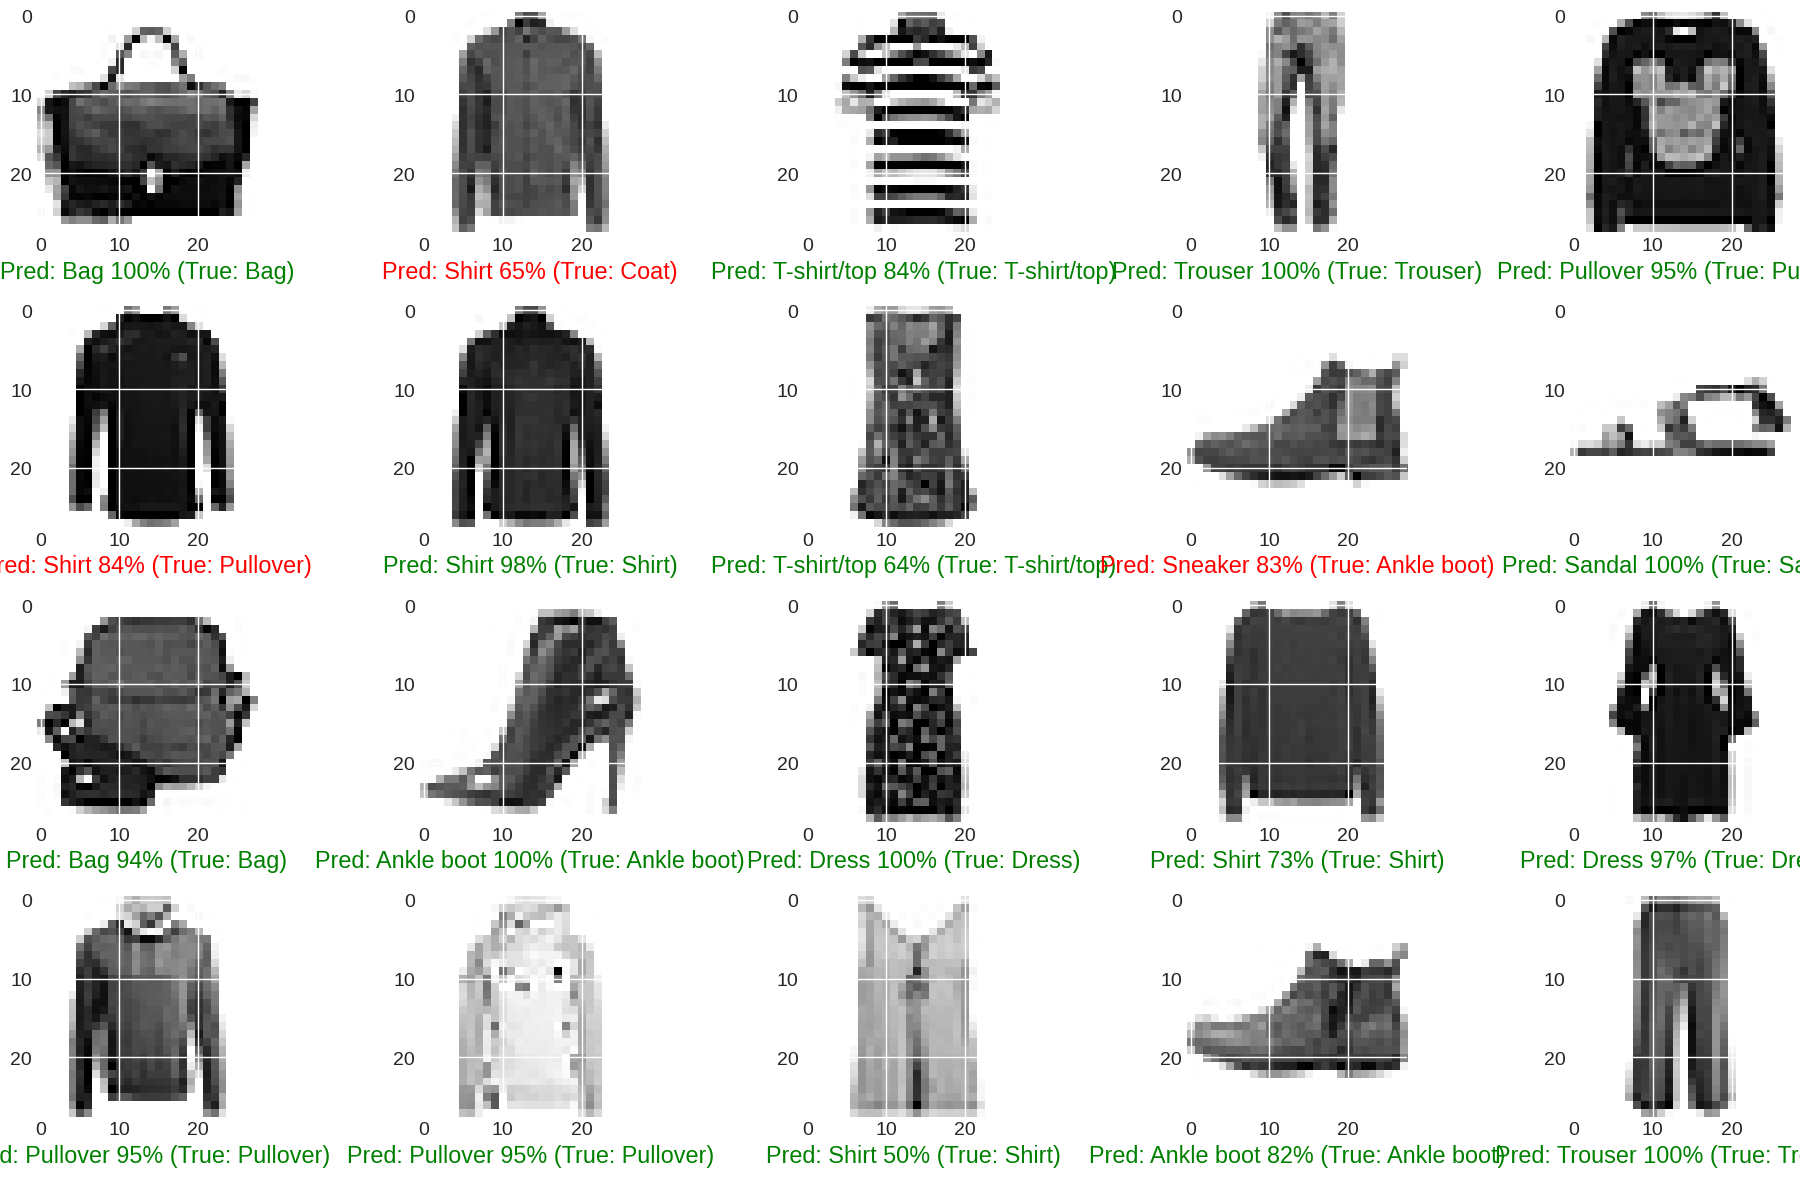

In [ ]:
import random
import matplotlib.pyplot as plt
import tensorflow as tf

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
    # Setup random integer
    i = random.randint(0, len(images) - 1)

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))  # reshape to correct size for model
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the target image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the title depending on if the prediction is correct
    color = "green" if pred_label == true_label else "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel(
        "Pred: {} {:2.0f}% (True: {})".format(
            pred_label,
            100 * tf.reduce_max(pred_probs),
            true_label
        ),
        color=color
    )

# Plot multiple random predictions
plt.figure(figsize=(20, 12))
plotnumber = 1

for i in range(20):
    if plotnumber <= 20:
        ax = plt.subplot(4, 5, plotnumber)
        plot_random_image(
            model=model,
            images=X_test,
            true_labels=y_test,
            classes=class_names
        )
        plotnumber += 1

plt.tight_layout()
plt.show()


### 23. Gunakan model yang sudah dibuat ini untuk memprediksi 5 image random

In [ ]:
X_new = X_test[:5]
y_proba = model.predict(X_new)
y_pred = np.argmax(y_proba, axis=1)
y_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([9, 2, 1, 1, 6])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

### 24. Inilah 5 image dan hasil prediksinya

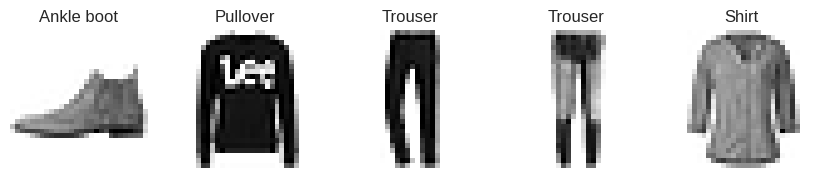

In [ ]:
y_new = y_test[:5]
X_new = X_test[:5]  # Tambahkan ini jika X_new belum didefinisikan

plt.figure(figsize=(9.2, 4.4))

for index, image in enumerate(X_new):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


## 9.6 Hasil Pengujian dan Pengamatan untuk Pengayaan Materi

### 1. Jalankan program di atas, dan dapatkan hasil prediksi untuk klasifikasi fashion di atas sampai Langkah 24.

### 2. Pada Langkah 11, lakukan perubahan nilai pada layer Dense sebagai berikut: 80, 70, 40, 20, 10. Dapatkan nilai evaluasi akurasi dan loss nya (Output langkah 16).


In [ ]:
# Membangun model dengan arsitektur baru
model_2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(80, activation='relu'),
    keras.layers.Dense(70, activation='relu'),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Kompilasi model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Training model
history_2 = model_2.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=4)

# Evaluasi model
loss_2, accuracy_2 = model_2.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy_2:.4f}")
print(f"Test loss: {loss_2:.4f}")

Epoch 1/4
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7395 - loss: 0.7253 - val_accuracy: 0.8117 - val_loss: 64.2978
Epoch 2/4
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8545 - loss: 0.3929 - val_accuracy: 0.8533 - val_loss: 47.3465
Epoch 3/4
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8700 - loss: 0.3524 - val_accuracy: 0.8255 - val_loss: 75.7428
Epoch 4/4
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8792 - loss: 0.3295 - val_accuracy: 0.8245 - val_loss: 69.2347
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8700 - loss: 0.3647
Test accuracy: 0.8681
Test loss: 0.3673


### 3. Ulangi Langkah 11, dengan merubah nilai pada layer Dense sebagai berikut: 120, 80, 50, 30, 10. Dapatkan nilai evaluasi akurasi dan loss nya (Output langkah 16).

In [ ]:
# Membangun model dengan arsitektur baru
model_3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(80, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Kompilasi model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Training model
history_3 = model_3.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=4)

# Evaluasi model
loss_3, accuracy_3 = model_3.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy_3:.4f}")
print(f"Test loss: {loss_3:.4f}")

Epoch 1/4
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7463 - loss: 0.7120 - val_accuracy: 0.8535 - val_loss: 46.5942
Epoch 2/4
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8548 - loss: 0.3932 - val_accuracy: 0.8520 - val_loss: 56.5022
Epoch 3/4
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8680 - loss: 0.3498 - val_accuracy: 0.8528 - val_loss: 55.6080
Epoch 4/4
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8783 - loss: 0.3273 - val_accuracy: 0.8543 - val_loss: 47.4559
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8694 - loss: 0.3572
Test accuracy: 0.8695
Test loss: 0.3582


### 4. Apa yang bisa anda simpulkan dari perubahan arsitektur ANN dengan mengubah jumlah node pada layer Dense, terhadap nilai akurasi dan loss?


#### Semakin banyak node pada layer Dense, model memiliki kapasitas lebih besar untuk mempelajari pola yang kompleks, terlalu banyak node bisa menyebabkan overfitting jika tidak diimbangi dengan data yang cukup

### 5. Kembalikan nilai layer Dense ke: 100, 70, 50, 20, 10. Lakukan pengujian berulangulang dengan mengubah-ubah nilai epoch ke 2, 10, 15 (harap diperhatikan, semakin besar nilai epoch, semakin lama waktu komputasi yang diperlukan). Pada setiap perubahan nilai epoch, catat hasil evaluasi akurasi dan loss nya.


In [ ]:
# Fungsi untuk membuat dan mengevaluasi model dengan epoch berbeda
def train_with_epochs(epochs):
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(70, activation='relu'),
        keras.layers.Dense(50, activation='relu'),
        keras.layers.Dense(20, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

    history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=epochs)
    loss, accuracy = model.evaluate(X_test, y_test)

    return loss, accuracy

# Epoch 2
print("\nEpoch = 2")
loss_2e, accuracy_2e = train_with_epochs(2)
print(f"Test accuracy: {accuracy_2e:.4f}")
print(f"Test loss: {loss_2e:.4f}")

# Epoch 10
print("\nEpoch = 10")
loss_10e, accuracy_10e = train_with_epochs(10)
print(f"Test accuracy: {accuracy_10e:.4f}")
print(f"Test loss: {loss_10e:.4f}")

# Epoch 15
print("\nEpoch = 15")
loss_15e, accuracy_15e = train_with_epochs(15)
print(f"Test accuracy: {accuracy_15e:.4f}")
print(f"Test loss: {loss_15e:.4f}")


Epoch = 2
Epoch 1/2
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7354 - loss: 0.7506 - val_accuracy: 0.8288 - val_loss: 61.2954
Epoch 2/2
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8580 - loss: 0.3944 - val_accuracy: 0.8390 - val_loss: 55.0971
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8686 - loss: 0.3737
Test accuracy: 0.8636
Test loss: 0.3784

Epoch = 10
Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7247 - loss: 0.7691 - val_accuracy: 0.8223 - val_loss: 64.2098
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8593 - loss: 0.3907 - val_accuracy: 0.8372 - val_loss: 60.2512
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8713 - loss: 0.3474 - val_accuracy: 0.8530 - val_loss: 46.5016
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8805 - loss: 0.3218 - val_accuracy: 0.8512 - val_loss: 47.3473
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8870 

### 6. Apa yang bisa anda simpulkan dari perubahan besarnya epoch pada proses training terhadap nilai akurasi dan loss?

#### Berdasarkan hasil training, semakin banyak epoch meningkatkan akurasi training (dari 85.8% ke 90.9%) tetapi tidak selalu meningkatkan akurasi validasi/test yang stabil di 83-88%, menunjukkan overfitting dengan loss validasi sangat tinggi (>50). Epoch optimal adalah 10 dengan akurasi test 88.1%.

### 7. Dari Pengamatan 2, berapa kesalahan prediksi yang terjadi terhadap 15 image random yang ditest ketika layer Dense diatur: 80, 70, 40, 20, 10 dengan epoch = 4?


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


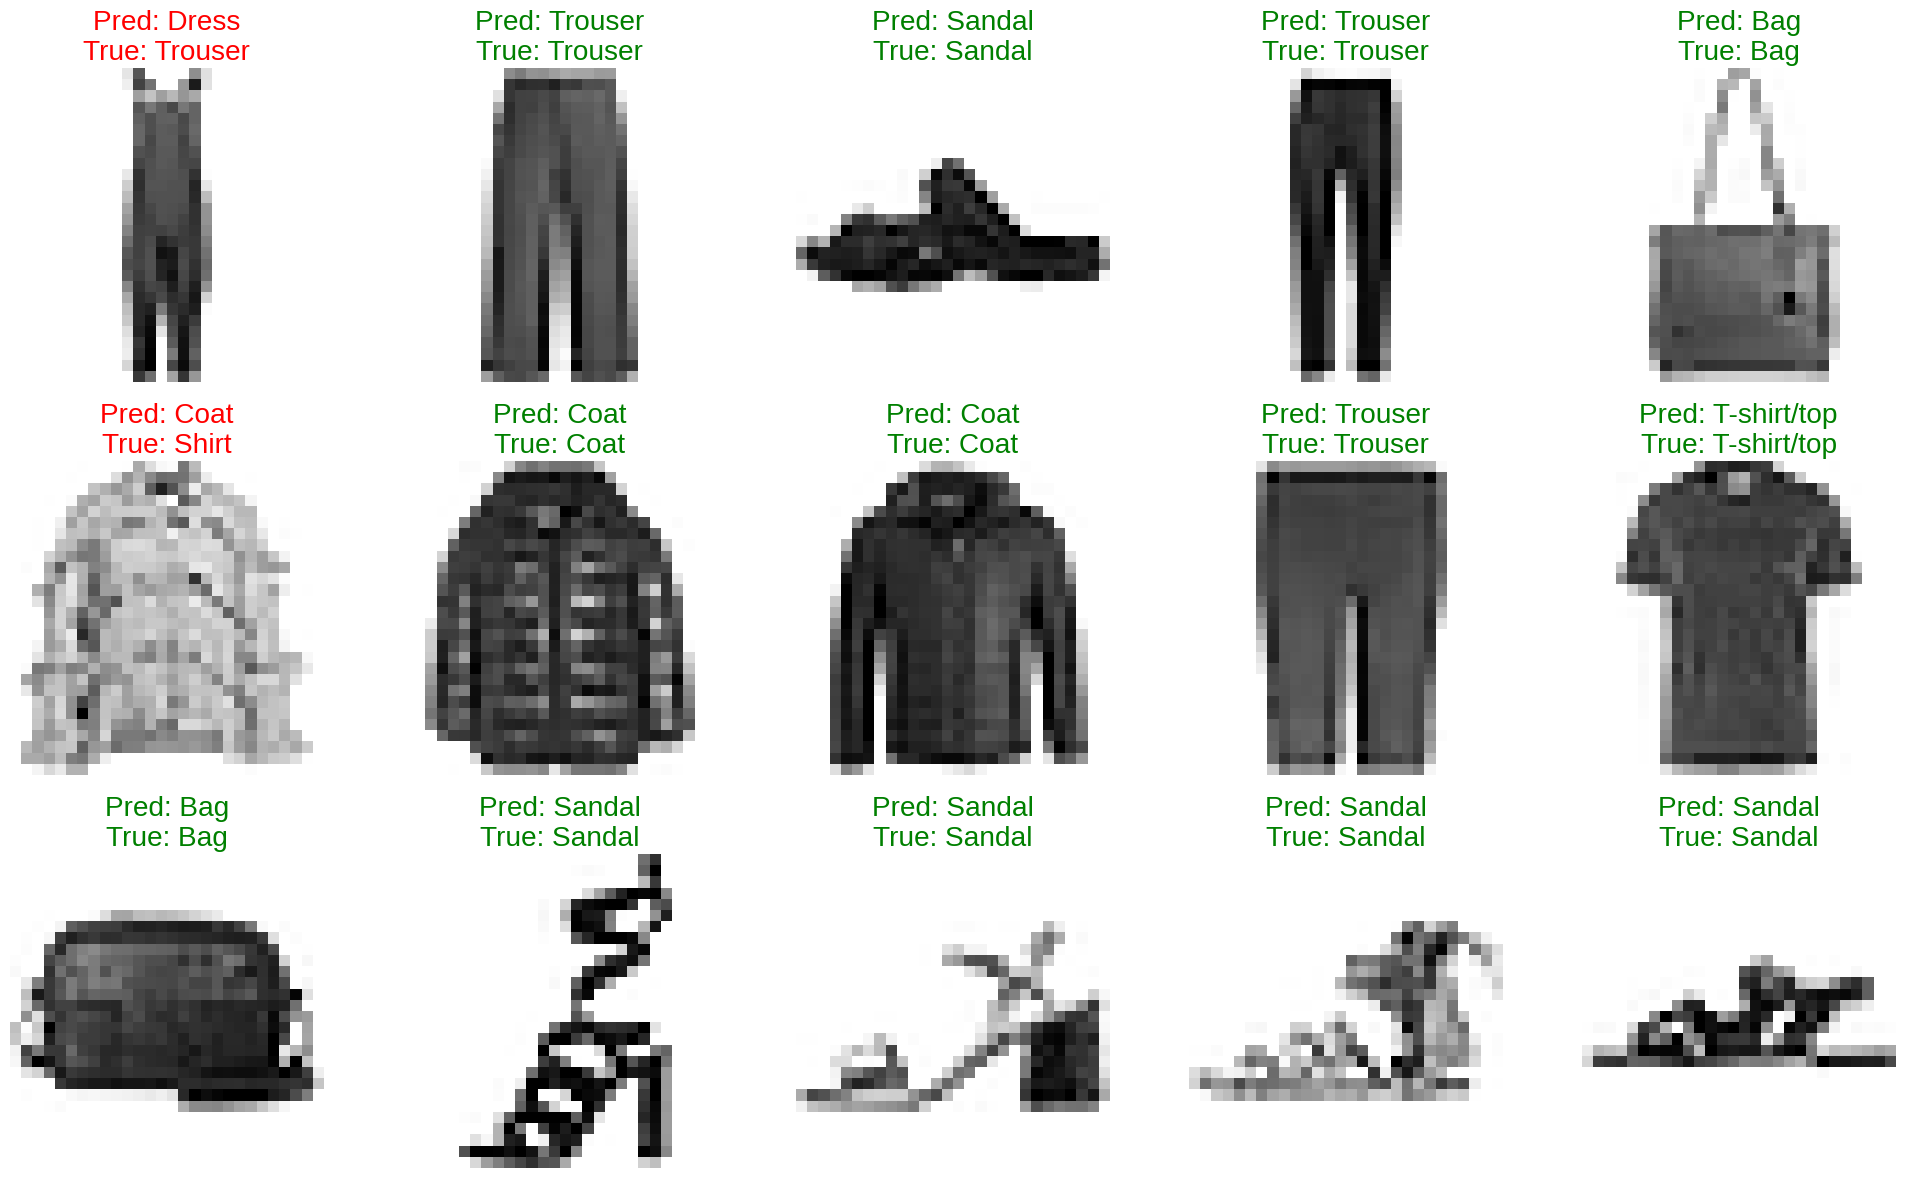

Jumlah kesalahan prediksi dari 15 gambar random: 2


In [ ]:
# Menggunakan model_2 yang sudah dibuat sebelumnya (arsitektur 80,70,40,20,10)

# Membuat prediksi
y_probs = model_2.predict(X_test)
y_preds = y_probs.argmax(axis=1)

# Menghitung kesalahan prediksi untuk 15 gambar random
random_indices = np.random.choice(len(X_test), 15, replace=False)
errors = 0

plt.figure(figsize=(20, 12))
for i, idx in enumerate(random_indices):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_test[idx], cmap='binary')
    pred_label = class_names[y_preds[idx]]
    true_label = class_names[y_test[idx]]

    if pred_label != true_label:
        color = 'red'
        errors += 1
    else:
        color = 'green'

    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Jumlah kesalahan prediksi dari 15 gambar random: {errors}")

### 8. Dari Pengamatan 5, berapa kesalahan prediksi yang terhadap 15 image random yang ditest ketika layer Dense diatur: 100, 70, 50, 20, 10 dengan epoch = 2?


Epoch 1/2
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7351 - loss: 0.7385 - val_accuracy: 0.8482 - val_loss: 51.9553
Epoch 2/2
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8569 - loss: 0.3890 - val_accuracy: 0.7950 - val_loss: 79.4095
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


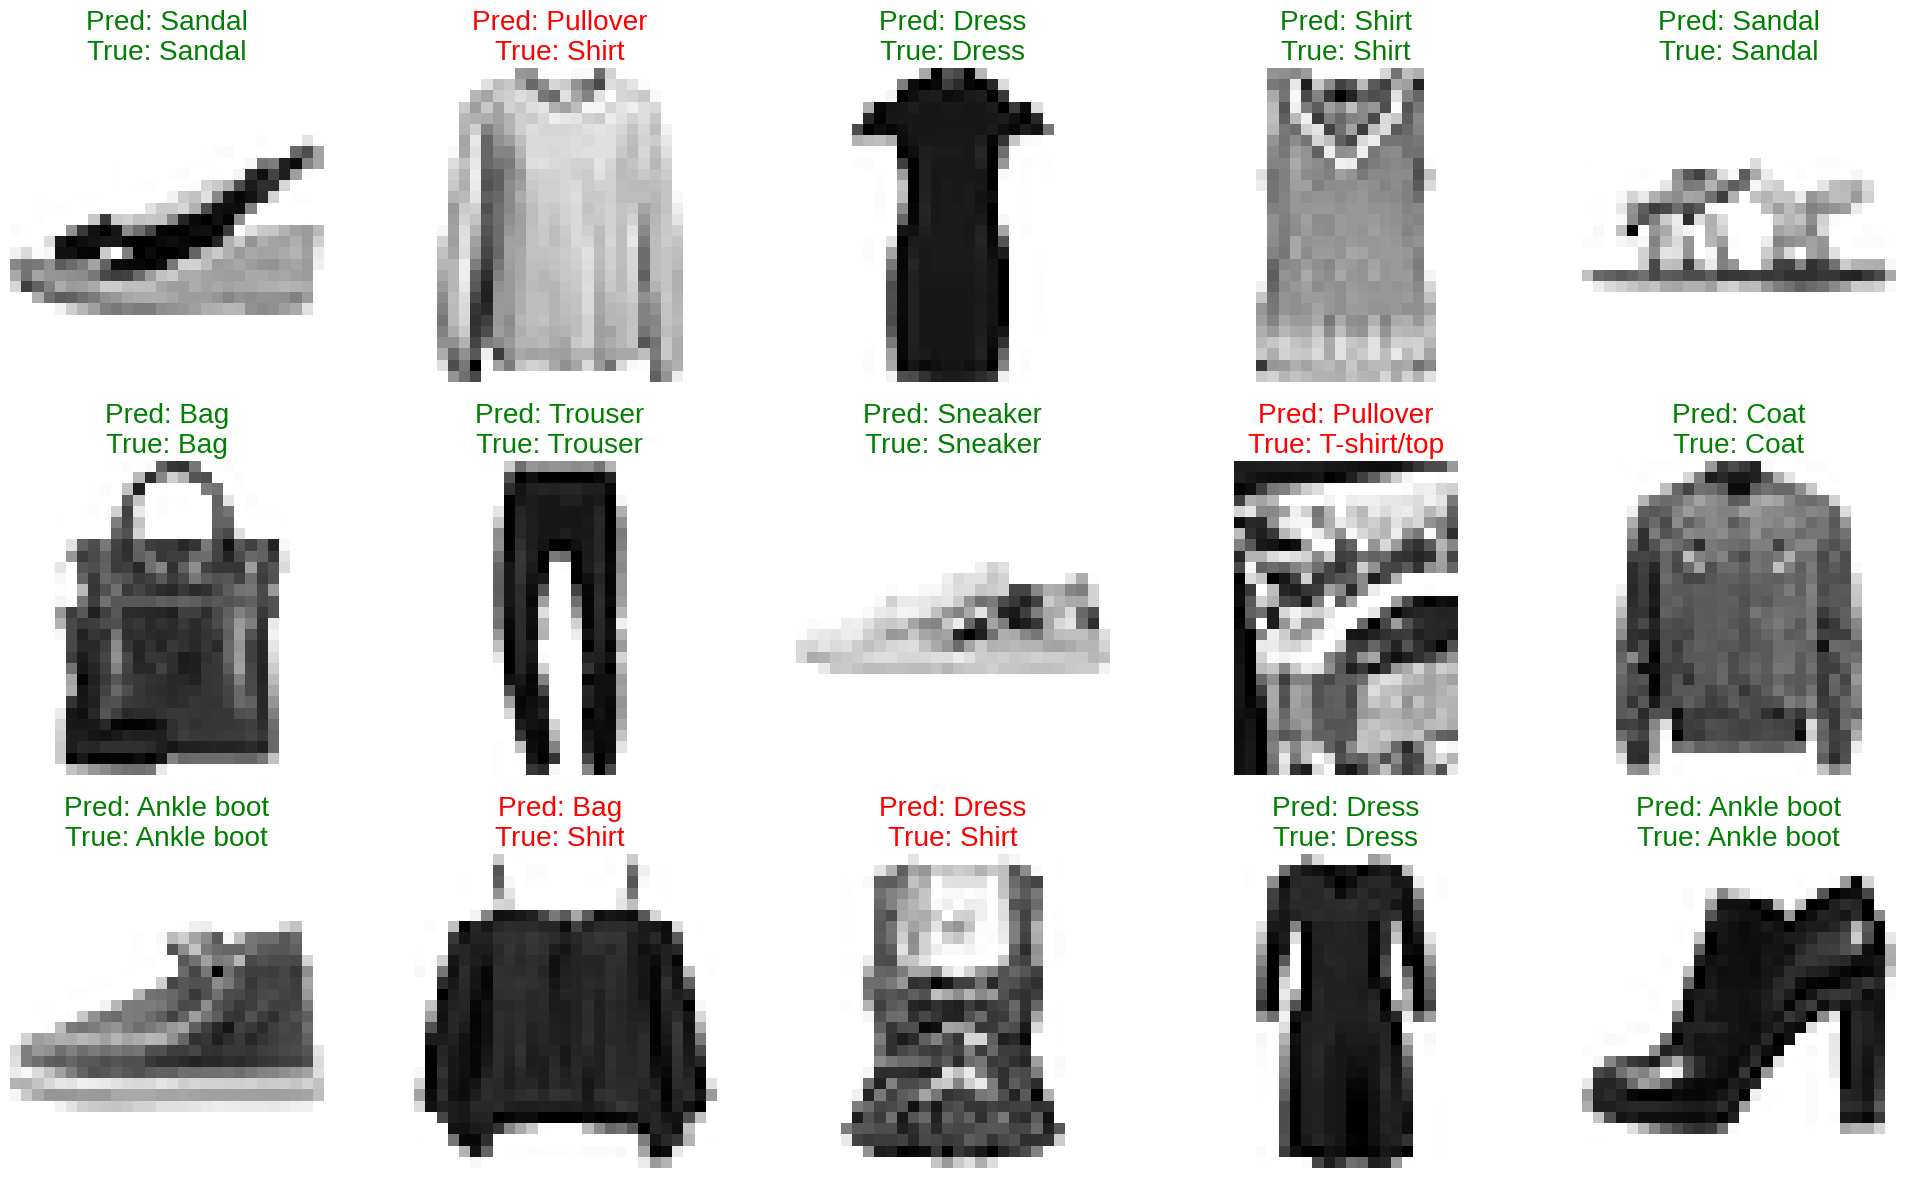

Jumlah kesalahan prediksi dari 15 gambar random: 4


In [ ]:
# Membuat model dengan arsitektur 100,70,50,20,10 dan epoch=2
model_temp = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(70, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_temp.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

model_temp.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=2)

# Membuat prediksi
y_probs = model_temp.predict(X_test)
y_preds = y_probs.argmax(axis=1)

# Menghitung kesalahan prediksi untuk 15 gambar random
random_indices = np.random.choice(len(X_test), 15, replace=False)
errors = 0

plt.figure(figsize=(20, 12))
for i, idx in enumerate(random_indices):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_test[idx], cmap='binary')
    pred_label = class_names[y_preds[idx]]
    true_label = class_names[y_test[idx]]

    if pred_label != true_label:
        color = 'red'
        errors += 1
    else:
        color = 'green'

    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Jumlah kesalahan prediksi dari 15 gambar random: {errors}")